In [1]:
import pandas as pd
import numpy as np

In [9]:
df=pd.read_csv('./datasets/피쳐선정전data.csv',encoding='euc-kr',index_col=0)
df

,재고순환지표(%p),경제심리지수,기계류내수출하지수(선박제외)(2020=100),건설수주액(실질)(십억원),수출입물가비율(2015=100),코스피(1980.1.4=100),장단기금리차(%p),외환보유액,뉴스심리지수,원/달러,...,WTI유,G7,G20,미장단기,거래량,종가,구리,천연가스,은,금
Date,,,,,,,,,,,,,,,,,,,,,
2008-01,5.0,112.1,98.5,10384.8,105.1,1853.7,0.67,"261,870,733",98.54,936.80,...,26.816444,101.32360,101.55890,1.03,11548.0,1000.00,3.06400,7.8500,15.290,860.0
2008-02,3.9,112.0,98.4,9246.1,103.7,1775.3,0.53,"262,364,808",97.88,944.10,...,26.276930,101.17920,101.28680,1.53,13564.0,897.97,3.27300,7.7400,16.916,913.5
2008-03,3.2,110.5,98.4,9434.4,102.2,1691.0,0.31,"264,245,660",88.12,946.70,...,26.771666,101.00270,100.97430,1.93,9948.0,873.82,3.92850,9.3460,20.180,984.2
2008-04,0.4,109.4,98.9,10121.7,100.7,1705.8,0.14,"260,482,546",103.73,983.50,...,27.311699,100.77290,100.60140,1.77,13964.0,965.78,3.80650,9.7240,16.935,887.8
2008-05,-1.6,106.1,98.5,9955.6,98.6,1758.2,0.22,"258,198,958",93.06,1009.10,...,25.481760,100.45830,100.14520,1.41,16690.0,1056.74,3.69450,10.5610,16.205,850.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12,-10.4,92.7,115.4,10568.5,85.2,2336.4,0.84,"423,163,664",83.39,1304.21,...,76.773430,98.70276,98.93524,-0.72,8411.0,1435.74,3.81750,6.7380,22.841,1815.2
2023-01,-15.4,90.9,111.2,13969.7,85.1,2380.4,0.45,"429,967,671",93.79,1269.02,...,78.254589,98.72142,98.97138,-0.61,10487.0,1343.91,3.79525,4.2735,24.328,1835.8
2023-02,-16.2,91.1,106.9,14725.6,84.6,2391.3,0.18,"425,286,150",97.48,1221.78,...,74.513809,98.74073,99.02458,-0.70,9732.0,1439.49,4.11100,2.4680,23.609,1927.8


In [10]:
df.columns

Index(['재고순환지표(%p)', '경제심리지수', '기계류내수출하지수(선박제외)(2020=100)', ' 건설수주액(실질)(십억원)',
       '수출입물가비율(2015=100)', '코스피(1980.1.4=100)', ' 장단기금리차(%p)', '외환보유액',
       '뉴스심리지수', '원/달러', '원/엔', '원/위안', 'CD91일', 'WTI유', 'G7', 'G20', '미장단기',
       '거래량', '종가', '구리', '천연가스', '은', '금'],
      dtype='object')

In [13]:
df['외환보유액']=df['외환보유액'].apply(lambda x: x.replace(',','')).astype('float')

In [17]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
pd.options.display.float_format = '{:.6f}'.format

adf_df = pd.DataFrame()  # 빈 데이터프레임 생성

for i in df.columns:
    adf_sample = adfuller(df[i], autolag='AIC')
    
    adf_result = pd.Series(adf_sample[:4], index=['stat', 'p_value', 'lag', 'observ'])
    sig_level = adf_sample[4]['5%']
    adf_result['5%'] = sig_level
    
    adf_df[i] = adf_result  # 결과를 데이터프레임에 열(column)로 추가

adf_df = adf_df.transpose()  # 행(row)과 열(column)을 전환하여 변환
adf_df

,stat,p_value,lag,observ,5%
재고순환지표(%p),-2.783690,0.060641,13.000000,170.000000,-2.878696
경제심리지수,-3.552008,0.006748,11.000000,172.000000,-2.878495
기계류내수출하지수(선박제외)(2020=100),-3.438825,0.009704,11.000000,172.000000,-2.878495
건설수주액(실질)(십억원),-1.347808,0.607026,13.000000,170.000000,-2.878696
수출입물가비율(2015=100),-3.072674,0.028643,13.000000,170.000000,-2.878696
코스피(1980.1.4=100),-2.039180,0.269662,13.000000,170.000000,-2.878696
장단기금리차(%p),-3.248320,0.017353,13.000000,170.000000,-2.878696
외환보유액,-3.124861,0.024767,13.000000,170.000000,-2.878696
뉴스심리지수,-5.673826,0.000001,12.000000,171.000000,-2.878595
원/달러,-3.574256,0.006273,0.000000,183.000000,-2.877467


In [18]:
df.describe()

,재고순환지표(%p),경제심리지수,기계류내수출하지수(선박제외)(2020=100),건설수주액(실질)(십억원),수출입물가비율(2015=100),코스피(1980.1.4=100),장단기금리차(%p),외환보유액,뉴스심리지수,원/달러,...,WTI유,G7,G20,미장단기,거래량,종가,구리,천연가스,은,금
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,...,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,-2.878804,98.221196,104.084783,10623.159239,93.974457,2083.170652,0.804511,355816400.173913,99.451141,1147.403641,...,51.999610,99.648447,99.676375,1.294130,13155.097826,1596.721957,3.170654,3.902791,20.696220,1390.829348
std,8.441417,9.709723,7.551556,3235.475727,6.470813,411.051564,0.756145,66415471.297658,10.366991,88.073532,...,17.433785,1.419289,1.520516,0.887853,7536.639375,400.347191,0.716308,1.911011,6.571561,304.309178
min,-24.900000,64.300000,85.300000,5352.400000,83.600000,1115.100000,-0.250000,200505915.000000,60.040000,936.800000,...,20.742956,92.328950,89.734220,-0.880000,5423.000000,575.080000,1.431000,1.587000,9.366000,726.800000
25%,-7.225000,94.825000,99.225000,7698.500000,87.775000,1915.850000,0.260000,310949949.250000,94.275000,1101.675000,...,34.090016,99.268888,99.405895,0.580000,8622.750000,1373.550000,2.689875,2.752500,16.343875,1205.075000
50%,-4.500000,97.750000,102.150000,10493.050000,94.250000,2011.250000,0.645000,368288515.500000,100.775000,1128.380000,...,55.674929,99.950430,100.037850,1.340000,10509.000000,1619.840000,3.121250,3.509000,18.364000,1314.650000
75%,0.450000,104.575000,111.475000,13262.775000,99.625000,2295.300000,1.095000,403766281.250000,105.727500,1185.875000,...,64.377068,100.539700,100.498600,1.935000,15230.500000,1886.657500,3.598375,4.350750,24.122750,1672.875000
max,31.300000,115.900000,119.600000,17969.600000,107.600000,3232.100000,2.900000,469207742.000000,119.420000,1570.200000,...,81.823387,101.612900,101.558900,2.870000,53655.000000,2395.140000,4.688500,13.505000,46.084000,1986.300000


In [20]:
df.aggregate([min,  
                np.mean,  
                np.std,  
                np.median,  
                max]  
).T.round(2)

,min,mean,std,median,max
재고순환지표(%p),-24.900000,-2.880000,8.440000,-4.500000,31.300000
경제심리지수,64.300000,98.220000,9.710000,97.750000,115.900000
기계류내수출하지수(선박제외)(2020=100),85.300000,104.080000,7.550000,102.150000,119.600000
건설수주액(실질)(십억원),5352.400000,10623.160000,3235.480000,10493.050000,17969.600000
수출입물가비율(2015=100),83.600000,93.970000,6.470000,94.250000,107.600000
코스피(1980.1.4=100),1115.100000,2083.170000,411.050000,2011.250000,3232.100000
장단기금리차(%p),-0.250000,0.800000,0.760000,0.640000,2.900000
외환보유액,200505915.000000,355816400.170000,66415471.300000,368288515.500000,469207742.000000
뉴스심리지수,60.040000,99.450000,10.370000,100.780000,119.420000
원/달러,936.800000,1147.400000,88.070000,1128.380000,1570.200000


In [21]:
import scipy.stats as scs
# print("Skewness: {:.7f}".format( scs.skew(log_return)) )
print("Skewness Test p-value: {:.7f}".format( scs.skewtest(df['재고순환지표(%p)'])[1]) ) # 샘플의 왜도가 정규분포와 일치하는지(0에 가까운 값을 가지는지 판단)

# print("Kurtosis: {:.7f}".format( scs.kurtosis(df['])) )
print("Kurtosis Test p-value: {:.7f}".format( scs.kurtosistest(df['재고순환지표(%p)'])[1]) ) # 샘플의 첨도가 정규분포와 일치하는지(0에 가까운 값을 가지는지 판단)
print("Normality Test p-value: {:.7f}".format( scs.normaltest(df['재고순환지표(%p)'])[1]) ) # 영가설: 샘플의 분포가 정규분포이다. (유의확률이 클수록 정규분포 가설을 강하게 지지)

Skewness Test p-value: 0.0000002
Kurtosis Test p-value: 0.0000553
Normality Test p-value: 0.0000000


In [24]:
import scipy.stats as scs
# print("Skewness: {:.7f}".format( scs.skew(log_return)) )
print("Skewness Test p-value: {:.7f}".format( scs.skewtest(df['코스피(1980.1.4=100)'])[1]) ) # 샘플의 왜도가 정규분포와 일치하는지(0에 가까운 값을 가지는지 판단)

# print("Kurtosis: {:.7f}".format( scs.kurtosis(df['])) )
print("Kurtosis Test p-value: {:.7f}".format( scs.kurtosistest(df['코스피(1980.1.4=100)'])[1]) ) # 샘플의 첨도가 정규분포와 일치하는지(0에 가까운 값을 가지는지 판단)
print("Kurtosis Test p-value: {:.7f}".format( scs.kurtosistest(df['코스피(1980.1.4=100)'])[0]) ) 
print("Normality Test p-value: {:.7f}".format( scs.normaltest(df['코스피(1980.1.4=100)'])[1]) ) # 영가설: 샘플의 분포가 정규분포이다. (유의확률이 클수록 정규분포 가설을 강하게 지지)

Skewness Test p-value: 0.0014267
Kurtosis Test p-value: 0.0146008
Kurtosis Test p-value: 2.4421318
Normality Test p-value: 0.0003136


In [28]:
# 컬럼들의 리스트
columns = df.columns

# 각 컬럼에 대한 출력
for column in columns:
    skewness_pvalue = scs.skewtest(df[column])[1]
    kurtosis_score = scs.kurtosistest(df[column])[0]
    kurtosis_pvalue = scs.kurtosistest(df[column])[1]
    normality_pvalue = scs.normaltest(df[column])[1]
    
    print("Column: {}".format(column))
    print("Skewness Test p-value: {:.7f}".format(skewness_pvalue))
    print("Skewness Score: {:.7f}".format(kurtosis_score))
    print("Kurtosis Test p-value: {:.7f}".format(kurtosis_pvalue))
    print("Normality Test p-value: {:.7f}".format(normality_pvalue))
    print()

Column: 재고순환지표(%p)
Skewness Test p-value: 0.0000002
Skewness Score: 4.0318311
Kurtosis Test p-value: 0.0000553
Normality Test p-value: 0.0000000

Column: 경제심리지수
Skewness Test p-value: 0.0000002
Skewness Score: 3.8108551
Kurtosis Test p-value: 0.0001385
Normality Test p-value: 0.0000000

Column: 기계류내수출하지수(선박제외)(2020=100)
Skewness Test p-value: 0.9724065
Skewness Score: -2.2418590
Kurtosis Test p-value: 0.0249705
Normality Test p-value: 0.0809791

Column:  건설수주액(실질)(십억원)
Skewness Test p-value: 0.1291297
Skewness Score: -5.7241204
Kurtosis Test p-value: 0.0000000
Normality Test p-value: 0.0000000

Column: 수출입물가비율(2015=100)
Skewness Test p-value: 0.5261441
Skewness Score: -7.9759112
Kurtosis Test p-value: 0.0000000
Normality Test p-value: 0.0000000

Column: 코스피(1980.1.4=100)
Skewness Test p-value: 0.0014267
Skewness Score: 2.4421318
Kurtosis Test p-value: 0.0146008
Normality Test p-value: 0.0003136

Column:  장단기금리차(%p)
Skewness Test p-value: 0.0000000
Skewness Score: 2.3569188
Kurtosis Tes

Text(0.5, 1.0, 'Log Return Series Q-Q Plot')

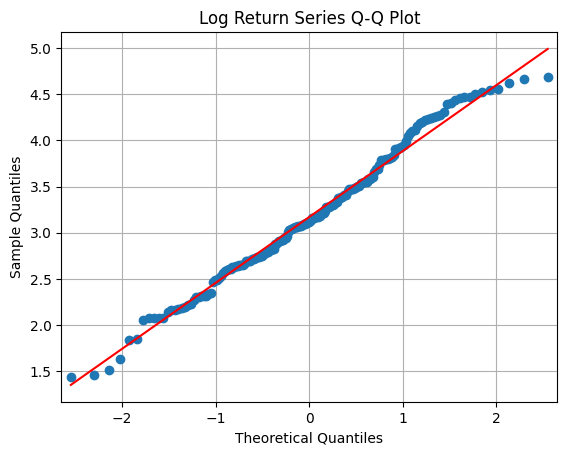

In [38]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(df[['구리']].values.flatten(), line='s')
plt.grid(True)
plt.xlabel("Theoretical Quantiles") #  (정규분포 상의 이론적 분위수)
plt.ylabel("Sample Quantiles") # (샘플 분위수)
plt.title("Log Return Series Q-Q Plot") # 강한 fat-tail


In [49]:
from arch import arch_model
import pandas as pd

# 가정: 'df'는 당신의 DataFrame이며 'timeseries' 컬럼이 검정하고자 하는 시계열 데이터임
series = df['은']

# ARCH 모델을 생성하고 학습
model = arch_model(series, vol='Garch', p=1, q=1) 
model_fit = model.fit()

# 결과 출력
model_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 358837592.5090992
Iteration:      2,   Func. Count:     12,   Neg. LLF: 16790871412.068558
Iteration:      3,   Func. Count:     19,   Neg. LLF: 830.3025183684867
Iteration:      4,   Func. Count:     26,   Neg. LLF: 563.2471511016427
Iteration:      5,   Func. Count:     33,   Neg. LLF: 550.2590638286588
Iteration:      6,   Func. Count:     39,   Neg. LLF: 533.9638745269874
Iteration:      7,   Func. Count:     45,   Neg. LLF: 528.8003048900345
Iteration:      8,   Func. Count:     51,   Neg. LLF: 526.025098046362
Iteration:      9,   Func. Count:     57,   Neg. LLF: 501.4754975754713
Iteration:     10,   Func. Count:     62,   Neg. LLF: 502.9121925418405
Iteration:     11,   Func. Count:     68,   Neg. LLF: 501.98249450402795
Iteration:     12,   Func. Count:     74,   Neg. LLF: 499.7842777213299
Iteration:     13,   Func. Count:     79,   Neg. LLF: 499.7764147781269
Iteration:     14,   Func. Count:     84,   Neg. LLF: 499.77611

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      은   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -499.776
Distribution:                  Normal   AIC:                           1007.55
Method:            Maximum Likelihood   BIC:                           1020.41
                                        No. Observations:                  184
Date:                Fri, Jun 16 2023   Df Residuals:                      183
Time:                        20:12:05   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            16.8820      0.196     86.098      0.000 [ 16.498, 17.266]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.6093      0.373      1.633      0.102 [ -0.122,  1.340]
alpha[1]       0.6601  7.645e-02      8.634  5.901e-18 [  0.510,  0.810]
beta[1]        0.3399  8.899e-02      3.820  1.336e-04 [  0.166,  0.514]
========================================================================

Covariance estimator: robust
"""

In [50]:
from arch import arch_model
import pandas as pd

# 가정: 'df'는 당신의 DataFrame이며 'timeseries' 컬럼이 검정하고자 하는 시계열 데이터임
series = df['기계류내수출하지수(선박제외)(2020=100)']

# ARCH 모델을 생성하고 학습
model = arch_model(series, vol='Garch', p=1, q=1) 
model_fit = model.fit()

# 결과 출력
model_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 16473.55497440703
Iteration:      2,   Func. Count:     12,   Neg. LLF: 15678608346.168373
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1150.315412636571
Iteration:      4,   Func. Count:     25,   Neg. LLF: 591.5714434845585
Iteration:      5,   Func. Count:     32,   Neg. LLF: 566.1647352104435
Iteration:      6,   Func. Count:     37,   Neg. LLF: 562.2572609285173
Iteration:      7,   Func. Count:     42,   Neg. LLF: 560.8710032057536
Iteration:      8,   Func. Count:     47,   Neg. LLF: 557.8434424592632
Iteration:      9,   Func. Count:     52,   Neg. LLF: 555.3783758493946
Iteration:     10,   Func. Count:     57,   Neg. LLF: 554.5928856585184
Iteration:     11,   Func. Count:     62,   Neg. LLF: 554.0141003188534
Iteration:     12,   Func. Count:     67,   Neg. LLF: 553.9597957982271
Iteration:     13,   Func. Count:     72,   Neg. LLF: 553.9594141494233
Iteration:     14,   Func. Count:     76,   Neg. LLF: 553.95941

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Constant Mean - GARCH Model Results                         
=====================================================================================
Dep. Variable:     기계류내수출하지수(선박제외)(2020=100)   R-squared:                       0.000
Mean Model:                    Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             GARCH   Log-Likelihood:               -553.959
Distribution:                         Normal   AIC:                           1115.92
Method:                   Maximum Likelihood   BIC:                           1128.78
                                               No. Observations:                  184
Date:                       Fri, Jun 16 2023   Df Residuals:                      183
Time:                               20:15:06   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu           101.3793      0.240    422.683      0.000 [1.009e+02,1.018e+02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          1.7584      4.499      0.391      0.696 [ -7.060, 10.577]
alpha[1]       1.0000      4.015      0.249      0.803 [ -6.870,  8.870]
beta[1]        0.0000      3.365      0.000      1.000 [ -6.595,  6.595]
========================================================================

Covariance estimator: robust
"""

In [52]:
df

,재고순환지표(%p),경제심리지수,기계류내수출하지수(선박제외)(2020=100),건설수주액(실질)(십억원),수출입물가비율(2015=100),코스피(1980.1.4=100),장단기금리차(%p),외환보유액,뉴스심리지수,원/달러,...,WTI유,G7,G20,미장단기,거래량,종가,구리,천연가스,은,금
Date,,,,,,,,,,,,,,,,,,,,,
2008-01,5.000000,112.100000,98.500000,10384.800000,105.100000,1853.700000,0.670000,261870733.000000,98.540000,936.800000,...,26.816444,101.323600,101.558900,1.030000,11548.000000,1000.000000,3.064000,7.850000,15.290000,860.000000
2008-02,3.900000,112.000000,98.400000,9246.100000,103.700000,1775.300000,0.530000,262364808.000000,97.880000,944.100000,...,26.276930,101.179200,101.286800,1.530000,13564.000000,897.970000,3.273000,7.740000,16.916000,913.500000
2008-03,3.200000,110.500000,98.400000,9434.400000,102.200000,1691.000000,0.310000,264245660.000000,88.120000,946.700000,...,26.771666,101.002700,100.974300,1.930000,9948.000000,873.820000,3.928500,9.346000,20.180000,984.200000
2008-04,0.400000,109.400000,98.900000,10121.700000,100.700000,1705.800000,0.140000,260482546.000000,103.730000,983.500000,...,27.311699,100.772900,100.601400,1.770000,13964.000000,965.780000,3.806500,9.724000,16.935000,887.800000
2008-05,-1.600000,106.100000,98.500000,9955.600000,98.600000,1758.200000,0.220000,258198958.000000,93.060000,1009.100000,...,25.481760,100.458300,100.145200,1.410000,16690.000000,1056.740000,3.694500,10.561000,16.205000,850.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12,-10.400000,92.700000,115.400000,10568.500000,85.200000,2336.400000,0.840000,423163664.000000,83.390000,1304.210000,...,76.773430,98.702760,98.935240,-0.720000,8411.000000,1435.740000,3.817500,6.738000,22.841000,1815.200000
2023-01,-15.400000,90.900000,111.200000,13969.700000,85.100000,2380.400000,0.450000,429967671.000000,93.790000,1269.020000,...,78.254589,98.721420,98.971380,-0.610000,10487.000000,1343.910000,3.795250,4.273500,24.328000,1835.800000
2023-02,-16.200000,91.100000,106.900000,14725.600000,84.600000,2391.300000,0.180000,425286150.000000,97.480000,1221.780000,...,74.513809,98.740730,99.024580,-0.700000,9732.000000,1439.490000,4.111000,2.468000,23.609000,1927.800000


In [51]:
from arch import arch_model
import pandas as pd

# 가정: 'df'는 당신의 DataFrame이며 'timeseries' 컬럼이 검정하고자 하는 시계열 데이터임
series = df['원/달러']

# ARCH 모델을 생성하고 학습
model = arch_model(series, vol='Garch', p=1, q=1) 
model_fit = model.fit()

# 결과 출력
model_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5233.344371636872
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1015.5653495778288
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1005.1638465375597
Iteration:      4,   Func. Count:     24,   Neg. LLF: 1004.4460636050263
Iteration:      5,   Func. Count:     29,   Neg. LLF: 1001.085573773328
Iteration:      6,   Func. Count:     34,   Neg. LLF: 1000.2261740752405
Iteration:      7,   Func. Count:     39,   Neg. LLF: 1000.092959612383
Iteration:      8,   Func. Count:     44,   Neg. LLF: 1000.0852690091065
Iteration:      9,   Func. Count:     49,   Neg. LLF: 1000.0759804768417
Iteration:     10,   Func. Count:     54,   Neg. LLF: 1000.0687841558664
Iteration:     11,   Func. Count:     59,   Neg. LLF: 1000.0374344727211
Iteration:     12,   Func. Count:     64,   Neg. LLF: 999.9701432153677
Iteration:     13,   Func. Count:     69,   Neg. LLF: 999.7947221852576
Iteration:     14,   Func. Count:     74,   Neg. LLF: 99

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   원/달러   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -992.937
Distribution:                  Normal   AIC:                           1993.87
Method:            Maximum Likelihood   BIC:                           2006.73
                                        No. Observations:                  184
Date:                Fri, Jun 16 2023   Df Residuals:                      183
Time:                        20:16:10   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu          1130.0297      6.195    182.410      0.000 [1.118e+03,1.142e+03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega        519.2428    142.340      3.648  2.644e-04 [2.403e+02,7.982e+02]
alpha[1]       0.9784      0.118      8.266  1.386e-16     [  0.746,  1.210]
beta[1]        0.0216  4.773e-02      0.453      0.650  [-7.191e-02,  0.115]
============================================================================

Covariance estimator: robust
"""